## Author : Abrar - 2027461

In [1]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns
import time

from pandas import DataFrame
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_validate as CV
from sklearn.model_selection import cross_val_score
import numpy as np

In [2]:
data = pd.DataFrame(pd.read_csv("NewFinalSample.csv"))
data.head()

,RecipeId,Name,RecipeCategory,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,...,ProteinContent,RecipeServings,CookTime,PrepTime,TotalTime,Review_Class,IngredientsCount,minimum_rating,maximum_rating,mean_of_rating
0,100335,Scrumptious Cheeseburger Ring,One Dish Meal,5.0,9.0,345.8,13.9,6.3,71.3,839.7,...,19.2,8.0,30,30,60,average,8,4.0,5.0,4.777778
1,317485,Mom's Comfort Chicken,One Dish Meal,5.0,15.0,305.5,15.9,3.4,80.7,1073.1,...,29.0,4.0,15,15,30,average,9,4.0,5.0,4.666667
2,136091,Hamburg Gravy,Deer,5.0,14.0,145.8,8.6,3.3,38.6,620.3,...,11.8,6.0,10,10,20,average,6,4.0,5.0,4.571429
3,206216,Gluten-Free Fried Mozzarella Sticks,Lunch/Snacks,5.0,9.0,367.3,24.8,13.4,185.1,1291.5,...,25.2,5.0,10,10,20,average,12,4.0,5.0,4.777778
4,221178,Cream Cheese Sugar Cookies,Drop Cookies,5.0,8.0,85.9,2.9,0.8,17.1,63.3,...,1.2,36.0,15,10,25,average,7,0.0,5.0,4.375000


### We will drop unnecessary columns

In [3]:
data = data.drop(['RecipeId', 'Name', "RecipeCategory", 'minimum_rating', 'maximum_rating', 'AggregatedRating', 'CookTime', 'PrepTime'], axis=1)

### Applying one hot encoding to categorical values

In [4]:
encoding = pd.get_dummies(data.Review_Class, drop_first= True)
data = pd.concat([data, encoding], axis = 1)
data = data.drop(['Review_Class'], axis = 1)

In [5]:
data.head()

,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,TotalTime,IngredientsCount,mean_of_rating,good,poor
0,9.0,345.8,13.9,6.3,71.3,839.7,35.6,2.8,5.5,19.2,8.0,60,8,4.777778,0,0
1,15.0,305.5,15.9,3.4,80.7,1073.1,11.7,1.1,2.1,29.0,4.0,30,9,4.666667,0,0
2,14.0,145.8,8.6,3.3,38.6,620.3,4.6,1.1,1.2,11.8,6.0,20,6,4.571429,0,0
3,9.0,367.3,24.8,13.4,185.1,1291.5,10.4,1.6,5.6,25.2,5.0,20,12,4.777778,0,0
4,8.0,85.9,2.9,0.8,17.1,63.3,13.8,0.2,7.0,1.2,36.0,25,7,4.375000,0,0


### Applying Principal Component Analysis
- we will apply PCA on highly correated columns

In [6]:
fat_data = data[['Calories', 'FatContent', 'SaturatedFatContent',
       'CholesterolContent', 'ProteinContent']]
X = scale(fat_data)

In [7]:
pca_fat = decomposition.PCA(n_components = 4)
# n_components means number of principal component we want to get
pca_fat.fit(X)
scores = pca_fat.transform(X)
fat_df = pd.DataFrame(scores, columns=["fat1", "fat2", "fat3", "fat4"])
fat_df.head()

,fat1,fat2,fat3,fat4
0,0.929157,0.236294,-0.108893,-0.005207
1,1.009146,1.070107,-0.339429,-0.121145
2,-0.760000,0.234923,0.202883,-0.280786
3,3.337544,0.246596,1.571086,-0.018115
4,-1.986659,0.055555,0.285537,0.049661


#### loading value for components

In [8]:
loadings = pca_fat.components_.T
fat_df_loadings = pd.DataFrame(loadings, columns = ['fat1', 'fat2', "fat3", "fat4"], index = fat_data.columns)
fat_df_loadings

,fat1,fat2,fat3,fat4
Calories,0.477938,-0.074315,-0.539708,0.476438
FatContent,0.472003,-0.397404,-0.113765,0.136582
SaturatedFatContent,0.442462,-0.500709,0.343713,-0.535448
CholesterolContent,0.428946,0.429137,0.685856,0.401645
ProteinContent,0.411122,0.633782,-0.327470,-0.553470


#### explained variance by Principal components

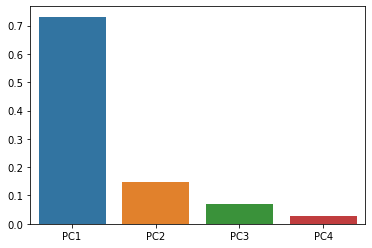

In [9]:
explained_ratio = pca_fat.explained_variance_ratio_.tolist()
pcdata = [["PC1", "PC2", "PC3", "PC4"], [0.7311802640572599,
 0.14921416140783153,
 0.07121541785643845,
 0.02780583635948466]]

ax = sns.barplot(x=pcdata[0], y=pcdata[1])

In [10]:
fat_df = fat_df[["fat1", "fat2"]]
#we will keep only two pc as it explains 88 percent of data
fat_df.head()


,fat1,fat2
0,0.929157,0.236294
1,1.009146,1.070107
2,-0.760000,0.234923
3,3.337544,0.246596
4,-1.986659,0.055555


In [11]:
p_data = data.drop(['Calories', 'FatContent', 'SaturatedFatContent',
       'CholesterolContent', 'ProteinContent'], axis = 1)
pca_data = pd.concat([p_data, fat_df], axis=1)
pca_data.head()

,ReviewCount,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,RecipeServings,TotalTime,IngredientsCount,mean_of_rating,good,poor,fat1,fat2
0,9.0,839.7,35.6,2.8,5.5,8.0,60,8,4.777778,0,0,0.929157,0.236294
1,15.0,1073.1,11.7,1.1,2.1,4.0,30,9,4.666667,0,0,1.009146,1.070107
2,14.0,620.3,4.6,1.1,1.2,6.0,20,6,4.571429,0,0,-0.760000,0.234923
3,9.0,1291.5,10.4,1.6,5.6,5.0,20,12,4.777778,0,0,3.337544,0.246596
4,8.0,63.3,13.8,0.2,7.0,36.0,25,7,4.375000,0,0,-1.986659,0.055555


# Now we have Original data and PCA data in pca.data and data

In [12]:
data.shape

(10000, 16)

In [13]:
pca_data.shape

(10000, 13)

In [14]:
results = pd.DataFrame(columns = ["Data_Type", "Kernel", "Spec", "MSE"])
results.head()

,Data_Type,Kernel,Spec,MSE


# Suppor Vector Machine Without PCA

In [15]:
#setting independant variables and target varialbes
X= data.drop(['mean_of_rating'], axis = 1)
Y = data["mean_of_rating"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=48)
#splitting data into 80:20 for train test, random state for reproducing the same result again and again
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 15) (8000,)
(2000, 15) (2000,)


In [16]:
%%time
#training data with SVM
svr = make_pipeline(StandardScaler(), SVR(kernel = 'rbf', C=1.0, epsilon=0.1))
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
y_true = y_test
mean_squared_error(y_true, y_pred)

Wall time: 3.23 s


0.26558136704251284

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


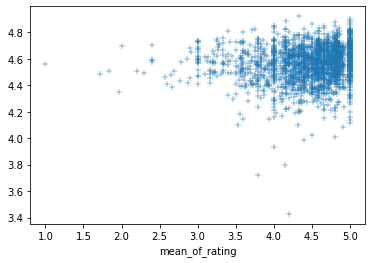

In [17]:
sns.scatterplot(y_true, y_pred, marker = '+')

In [18]:
y_pred_list = y_pred.tolist()
prediction_df = DataFrame(y_pred_list,columns=['Prediction'])
y_true_list = y_true.tolist()
true_df = DataFrame(y_true_list,columns=['True'])
result = pd.concat([prediction_df, true_df], axis=1)
result.head()

,Prediction,True
0,4.665809,4.400000
1,4.582322,4.285714
2,4.518514,5.000000
3,4.554438,4.000000
4,4.598648,4.200000


### Radial based function with c= 1.0 and epsilon = 0.1, with 5fold CV

In [19]:
rbf1 = make_pipeline(StandardScaler(),SVR(kernel = 'rbf', C=1.0, epsilon=0.1))
scores = cross_val_score(rbf1, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("MSE")
x = np.mean(scores) * -1
print(x)
details = [["without PCA", "RBF", "c=1.0, epsilon=1.0", x]]
results = results.append(pd.DataFrame(details, columns=["Data_Type", "Kernel", "Spec", "MSE"]), ignore_index=True)


MSE
0.27333159366871873


### Radial based function with c= 2.0 and epsilon = 0.1, with 5fold CV

In [20]:
rbf2 = make_pipeline(StandardScaler(),SVR(kernel = 'rbf', C=2.0, epsilon=0.1))
scores = cross_val_score(rbf2, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("MSE")
x = np.mean(scores) * -1
print(x)
details = [["without PCA", "RBF", "c=2.0, epsilon=1.0", x]]
results = results.append(pd.DataFrame(details, columns=["Data_Type", "Kernel", "Spec", "MSE"]), ignore_index=True)


MSE
0.27716240068671205


### Polynomial two degree kernel, with 5fold CV

In [21]:
poly2 = make_pipeline(StandardScaler(), SVR(kernel = 'poly', degree =2))
scores = cross_val_score(poly2, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("MSE")
x = np.mean(scores) * -1
print(x)
details = [["without PCA", "Polynomial", "degree=2", x]]
results = results.append(pd.DataFrame(details, columns=["Data_Type", "Kernel", "Spec", "MSE"]), ignore_index=True)

MSE
0.27571448249910396


### Polynomial three degree kernel, with 5fold CV

In [22]:
poly3 = make_pipeline(StandardScaler(), SVR(kernel = 'poly', degree =3))
scores = cross_val_score(poly3, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("MSE")
x = np.mean(scores) * -1
print(x)
details = [["without PCA", "Polynomial", "degree=3", x]]
results = results.append(pd.DataFrame(details, columns=["Data_Type", "Kernel", "Spec", "MSE"]), ignore_index=True)

MSE
0.3163541343176822


### Polynomial four degree kernel, with 5fold CV

In [23]:
poly4 = make_pipeline(StandardScaler(), SVR(kernel = 'poly', degree =4))
scores = cross_val_score(poly4, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("MSE")
x = np.mean(scores) * -1
print(x)
details = [["without PCA", "Polynomial", "degree=4", x]]
results = results.append(pd.DataFrame(details, columns=["Data_Type", "Kernel", "Spec", "MSE"]), ignore_index=True)

MSE
1.0502834464768434


# Suppor Vector Machine With PCA

In [24]:
#setting independant variables and target varialbes
X= pca_data.drop(['mean_of_rating'], axis = 1)
Y = pca_data["mean_of_rating"]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=48)
#splitting data into 80:20 for train test, random state for reproducing the same result again and again
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 12) (8000,)
(2000, 12) (2000,)


### Radial based function with c= 1.0 and epsilon = 0.1, with 5fold CV

In [25]:
rbf1 = make_pipeline(StandardScaler(),SVR(kernel = 'rbf', C=1.0, epsilon=0.1))
scores = cross_val_score(rbf1, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("MSE")
x = np.mean(scores) * -1
print(x)
details = [["with PCA", "RBF", "c=1.0, epsilon=1.0", x]]
results = results.append(pd.DataFrame(details, columns=["Data_Type", "Kernel", "Spec", "MSE"]), ignore_index=True)

MSE
0.2731226986277662


### Radial based function with c= 2.0 and epsilon = 0.1, with 5fold CV

In [26]:
rbf2 = make_pipeline(StandardScaler(),SVR(kernel = 'rbf', C=2.0, epsilon=0.1))
scores = cross_val_score(rbf2, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("MSE")
x = np.mean(scores) * -1
print(x)
details = [["with PCA", "RBF", "c=2.0, epsilon=1.0", x]]
results = results.append(pd.DataFrame(details, columns=["Data_Type", "Kernel", "Spec", "MSE"]), ignore_index=True)

MSE
0.276861667987644


### Polynomial two degree kernel, with 5fold CV

In [27]:
poly2 = make_pipeline(StandardScaler(), SVR(kernel = 'poly', degree =2))
scores = cross_val_score(poly2, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("MSE")
x = np.mean(scores) * -1
print(x)
details = [["with PCA", "Polynomial", "degree=2", x]]
results = results.append(pd.DataFrame(details, columns=["Data_Type", "Kernel", "Spec", "MSE"]), ignore_index=True)

MSE
0.2760970140748745


### Polynomial three degree kernel, with 5fold CV

In [28]:
poly3 = make_pipeline(StandardScaler(), SVR(kernel = 'poly', degree =3))
scores = cross_val_score(poly3, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("MSE")
x = np.mean(scores) * -1
print(x)
details = [["with PCA", "Polynomial", "degree=3", x]]
results = results.append(pd.DataFrame(details, columns=["Data_Type", "Kernel", "Spec", "MSE"]), ignore_index=True)

MSE
0.36122763296870003


### Polynomial four degree kernel, with 5fold CV

In [29]:
poly4 = make_pipeline(StandardScaler(), SVR(kernel = 'poly', degree =4))
scores = cross_val_score(poly4, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("MSE")
x = np.mean(scores) * -1
print(x)
details = [["with PCA", "Polynomial", "degree=4", x]]
results = results.append(pd.DataFrame(details, columns=["Data_Type", "Kernel", "Spec", "MSE"]), ignore_index=True)

MSE
2.0548804491923796


# Lets see the results with and without PCA

In [30]:
#we reindex the result so that we can easily compare with and without PCA effect
results.reindex([0, 5, 1, 6, 2, 7, 3, 8, 4, 9])

,Data_Type,Kernel,Spec,MSE
0,without PCA,RBF,"c=1.0, epsilon=1.0",0.273332
5,with PCA,RBF,"c=1.0, epsilon=1.0",0.273123
1,without PCA,RBF,"c=2.0, epsilon=1.0",0.277162
6,with PCA,RBF,"c=2.0, epsilon=1.0",0.276862
2,without PCA,Polynomial,degree=2,0.275714
7,with PCA,Polynomial,degree=2,0.276097
3,without PCA,Polynomial,degree=3,0.316354
8,with PCA,Polynomial,degree=3,0.361228
4,without PCA,Polynomial,degree=4,1.050283
9,with PCA,Polynomial,degree=4,2.054880
